In [43]:
from glob import glob
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Configuration

In [47]:
rc("font", size=18, weight="normal")

In [48]:
DATADIR = Path("data", "finite_size")

# Data loading

In [36]:
results = []
for filename in DATADIR.glob("*.json"):
    print(filename)
    with filename.open("r") as f:
        result = json.load(f)
    result["filename"] = filename
    results.append(result)
    print("evaluation with guessed parameters: {}".format(result["eval_guessed"]))
    print("******************************************************************************")

data/finite_size/result_57835313780193.json
evaluation with guessed parameters: -0.2364055707209225
******************************************************************************
data/finite_size/result_13475194751807.json
evaluation with guessed parameters: -0.1745782246789231
******************************************************************************
data/finite_size/result_9030215595951.json
evaluation with guessed parameters: -0.12855990248389468
******************************************************************************
data/finite_size/result_7038451216073.json
evaluation with guessed parameters: -0.23961427788593442
******************************************************************************
data/finite_size/result_65132123728768.json
evaluation with guessed parameters: -0.1903136253149532
******************************************************************************
data/finite_size/result_23932011452045.json
evaluation with guessed parameters: -0.16709943147121525
****

evaluation with guessed parameters: -0.17778150955617866
******************************************************************************
data/finite_size/result_6409575400299.json
evaluation with guessed parameters: -0.13420362304940944
******************************************************************************
data/finite_size/result_20038046918480.json
evaluation with guessed parameters: -0.14277935266889716
******************************************************************************
data/finite_size/result_59039373267931.json
evaluation with guessed parameters: -0.23728460351317793
******************************************************************************
data/finite_size/result_8170499554652.json
evaluation with guessed parameters: -0.16132126653048598
******************************************************************************
data/finite_size/result_29650098460655.json
evaluation with guessed parameters: -0.21836192307325009
*********************************************

# Erdos-Renyi graphs

## Data loading

### Parameters

In [37]:
n = 16 # Number of vertices

### Load all results

In [38]:
summary_results = sorted(
    [
        {
            "n": result["n"],
            "d": result["d"],
            "eval_guessed": result["eval_guessed"],
            "opt_guessed": result["opt_guessed"][1],
            "best_opt_random": result["best_opt_random"][1],
            "opt_guessed_distance": np.linalg.norm(np.array(result["opt_guessed"][0]) - np.array(result["guessed_params"])) / np.sqrt(2 * result["p"] * np.pi),
            "num_trials": result["num_trials"],
            "opt_guessed_distance": np.linalg.norm(np.array(result["opt_guessed"][0]) - np.array(result["guessed_params"])) / np.sqrt(2 * result["p"] * np.pi),
            "opt_gammas_guessed_distance": np.linalg.norm(np.array(result["opt_guessed"][0][0::2]) - np.array(result["guessed_params"][0::2])) / np.sqrt(result["p"] * np.pi),
            "opt_betas_guessed_distance": np.linalg.norm(np.array(result["opt_guessed"][0][1::2]) - np.array(result["guessed_params"][1::2])) / np.sqrt(result["p"] * np.pi),
            "worst_opt_guessed_num_trials": result["worst_opt_guessed_num_trials"],
            "best_opt_guessed_num_trials": result["best_opt_guessed_num_trials"],
            "worst_eval_guessed_num_trials": result["worst_eval_guessed_num_trials"],
            "best_eval_guessed_num_trials": result["best_eval_guessed_num_trials"]
        }
        for result in results
        if "d" in result
    ],
    key=lambda result: (result["n"], result["d"])
)
summary_results_df = pd.DataFrame(summary_results)

### Select relevant results

In [39]:
selected_df = summary_results_df.query(f"n == {n} and opt_guessed_distance < 0.4")

### Generate plots

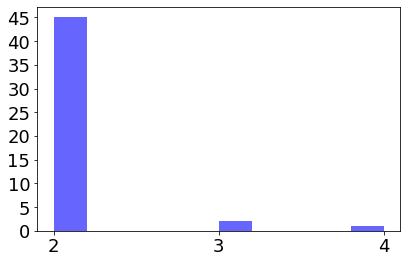

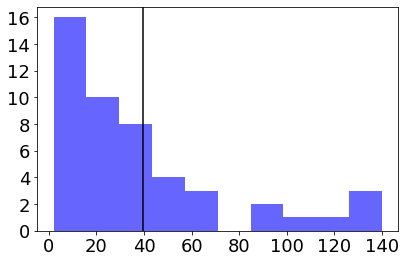

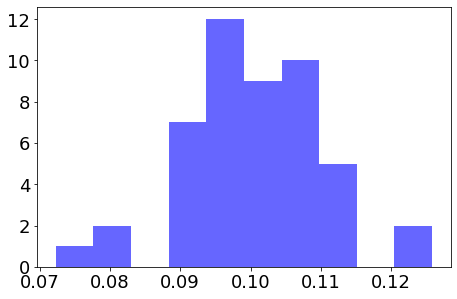

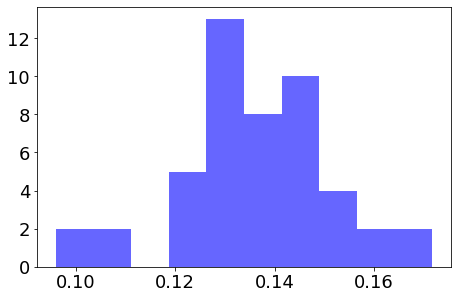

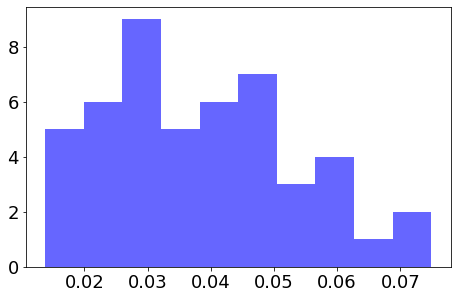

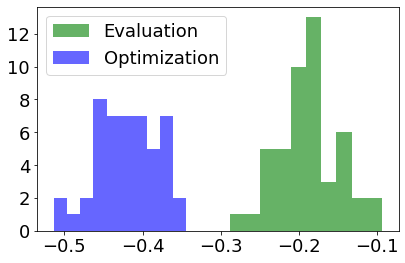

number of examples: 48
N_eval > 100: 0
N_opt > 100: 0


In [49]:
fig, ax = plt.subplots()
ax.hist(selected_df["best_eval_guessed_num_trials"], fc=(0, 0, 1, 0.6), label="$N_{\mathrm{eval}}$")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"erdos_renyi_num_trials_eval_n={n}.png"))
plt.show()

fig, ax = plt.subplots()
ax.hist(selected_df["best_opt_guessed_num_trials"], fc=(0, 0, 1, 0.6), label="$N_{\mathrm{opt}}$")
ax.axvline(np.mean(selected_df["best_opt_guessed_num_trials"]), color="k", label="$\left\langle N_{\mathrm{opt}}\\right\\rangle$")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#ax.legend()
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"erdos_renyi_num_trials_opt_n={n}.png"))
plt.show()

fig, ax = plt.subplots(figsize=(6.7, 4.5))
ax.hist(selected_df["opt_guessed_distance"], fc=(0, 0, 1, 0.6))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"erdos_renyi_parameters_distance_n={n}.png"))
plt.show()

fig, ax = plt.subplots(figsize=(6.7, 4.5))
ax.hist(selected_df["opt_gammas_guessed_distance"], fc=(0, 0, 1, 0.6))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"erdos_renyi_parameters_distance_gammas_n={n}.png"))
plt.show()

fig, ax = plt.subplots(figsize=(6.7, 4.5))
ax.hist(selected_df["opt_betas_guessed_distance"], fc=(0, 0, 1, 0.6))
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"erdos_renyi_parameters_distance_betas_n={n}.png"))
plt.show()

fig, ax = plt.subplots()
ax.hist(selected_df["eval_guessed"], fc=(0, 0.5, 0, 0.6), label="Evaluation")
ax.hist(selected_df["opt_guessed"], fc=(0, 0, 1, 0.6), label="Optimization")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend()
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"erdos_renyi_eval_opt_n={n}.png"))
plt.show()

print("number of examples: {}".format(len(selected_df)))
print("N_eval > 100: {}".format(sum(selected_df["best_eval_guessed_num_trials"].isna())))
print("N_opt > 100: {}".format(sum(selected_df["best_opt_guessed_num_trials"].isna())))

# Chung-Lu graphs

## Data loading

### Parameters

In [52]:
n = 16

### Load all results

In [55]:
summary_results = sorted(
    [
        {
            "n": result["n"],
            "ddist": result["ddist"],
            "eval_guessed": result["eval_guessed"],
            "eval_guessed2": result["eval_guessed2"],
            "best_eval_guessed": min(result["eval_guessed"], result["eval_guessed2"]),
            "opt_guessed": result["opt_guessed"][1],
            "opt_guessed2": result["opt_guessed2"][1],
            "best_opt_random": result["best_opt_random"][1],
            "best_opt_guessed": result["best_opt_guessed"][1],
            "opt_guessed_distance": np.linalg.norm(np.array(result["opt_guessed"][0]) - np.array(result["guessed_params"])) / np.sqrt(2 * result["p"] * np.pi),
            "opt_guessed2_distance": np.linalg.norm(np.array(result["opt_guessed2"][0]) - np.array(result["guessed_params2"])) / np.sqrt(2 * result["p"] * np.pi),
            "opt_gammas_guessed_distance": np.linalg.norm(np.array(result["opt_guessed"][0][0::2]) - np.array(result["guessed_params"][0::2])) / np.sqrt(result["p"] * np.pi),
            "opt_gammas_guessed2_distance": np.linalg.norm(np.array(result["opt_guessed2"][0][0::2]) - np.array(result["guessed_params2"][0::2])) / np.sqrt(result["p"] * np.pi),
            "opt_betas_guessed_distance": np.linalg.norm(np.array(result["opt_guessed"][0][1::2]) - np.array(result["guessed_params"][1::2])) / np.sqrt(result["p"] * np.pi),
            "opt_betas_guessed2_distance": np.linalg.norm(np.array(result["opt_guessed2"][0][1::2]) - np.array(result["guessed_params2"][1::2])) / np.sqrt(result["p"] * np.pi),
            "worst_eval_guessed_num_trials": result["worst_eval_guessed_num_trials"],
            "best_eval_guessed_num_trials": result["best_eval_guessed_num_trials"],
            "worst_opt_guessed_num_trials": result["worst_opt_guessed_num_trials"],
            "best_opt_guessed_num_trials": result["best_opt_guessed_num_trials"],
            "num_trials": result["num_trials"],
            "filename": result["filename"]
        }
        for result in results
        if "ddist" in result
    ],
    key=lambda result: (result["n"], result["ddist"])
)
summary_results_df = pd.DataFrame(summary_results)

### Select relevant results

In [57]:
selected_df = summary_results_df.query(f"n == {n} and opt_guessed_distance < 0.4 and opt_guessed2_distance < 0.4")

### Generate plots

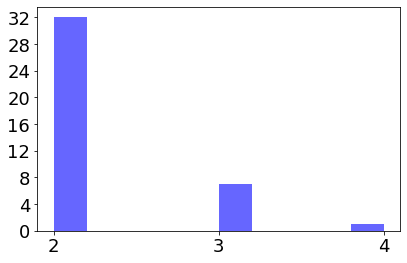

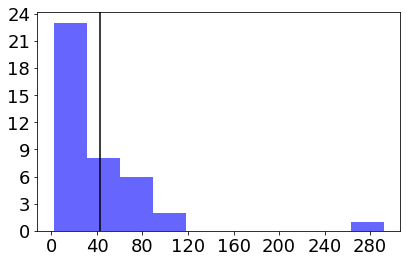

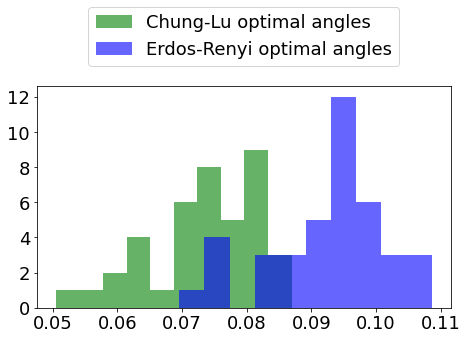

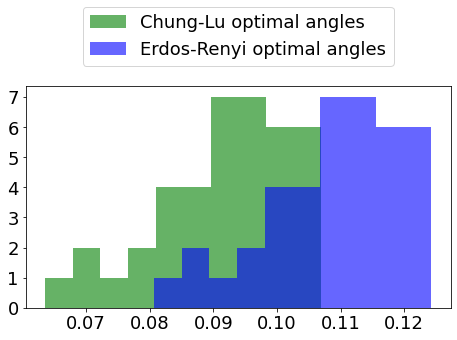

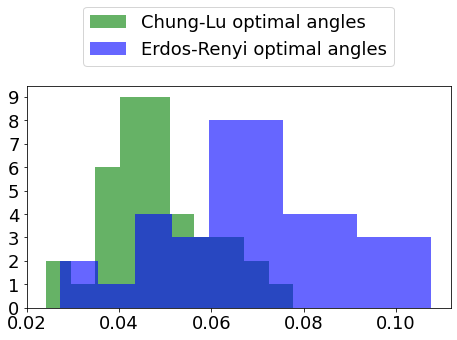

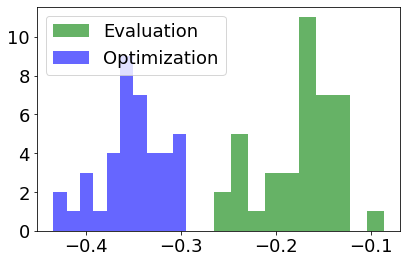

number of examples: 40
N_eval > 100: 0
N_opt > 100: 0


In [59]:
fig, ax = plt.subplots()
ax.hist(selected_df["best_eval_guessed_num_trials"], fc=(0, 0, 1, 0.6), label="$N_{\mathrm{eval}}$")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"chung_lu_num_trials_eval_n={n}.png"))
plt.show()

fig, ax = plt.subplots()
ax.hist(selected_df["best_opt_guessed_num_trials"], fc=(0, 0, 1, 0.6), label="$N_{\mathrm{eval}}$")
ax.axvline(np.mean(selected_df["best_opt_guessed_num_trials"]), color="k", label="$\left\langle N_{\mathrm{opt}}\\right\\rangle$")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"chung_lu_num_trials_opt_n={n}.png"))
plt.show()

fig, ax = plt.subplots(figsize=(6.7, 5.5))
ax.hist(selected_df["opt_guessed_distance"], fc=(0, 0.5, 0, 0.6), label="Chung-Lu optimal angles")
ax.hist(selected_df["opt_guessed2_distance"], fc=(0, 0, 1, 0.6), label="Erdos-Renyi optimal angles")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.4))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"chung_lu_parameters_distance_n={n}.png"))
plt.show()

fig, ax = plt.subplots(figsize=(6.7, 5.5))
ax.hist(selected_df["opt_gammas_guessed_distance"], fc=(0, 0.5, 0, 0.6), label="Chung-Lu optimal angles")
ax.hist(selected_df["opt_gammas_guessed2_distance"], fc=(0, 0, 1, 0.6), label="Erdos-Renyi optimal angles")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.4))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"chung_lu_parameters_distance_gammas_n={n}.png"))
plt.show()

fig, ax = plt.subplots(figsize=(6.7, 5.5))
ax.hist(selected_df["opt_betas_guessed_distance"], fc=(0, 0.5, 0, 0.6), label="Chung-Lu optimal angles")
ax.hist(selected_df["opt_betas_guessed2_distance"], fc=(0, 0, 1, 0.6), label="Erdos-Renyi optimal angles")
#plt.axvline(0.566883, label="Random angles")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.4))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"chung_lu_parameters_distance_betas_n={n}.png"))
plt.show()

fig, ax = plt.subplots()
ax.hist(selected_df["best_eval_guessed"], fc=(0, 0.5, 0, 0.6), label="Evaluation")
ax.hist(selected_df["best_opt_guessed"], fc=(0, 0, 1, 0.6), label="Optimization")
ax.legend(loc="upper left", bbox_to_anchor=(0.0, 1.0))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(Path("figures", "finite_size", f"chung_lu_eval_opt_n={n}.png"))
plt.show()

print("number of examples: {}".format(len(selected_df)))
print("N_eval > 100: {}".format(sum(selected_df["best_eval_guessed_num_trials"].isna())))
print("N_opt > 100: {}".format(sum(selected_df["best_opt_guessed_num_trials"].isna())))